In [152]:
# import libray functions

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten,Bidirectional,Activation, Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [153]:
url='https://raw.githubusercontent.com/niloytanvir/heart-failure-data/main/Data/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url)

In [154]:
x = data.iloc[:,:-1].values
y = data['DEATH_EVENT']

In [155]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [156]:
xtrain, a, ytrain, b=train_test_split(x, y, test_size=0.4, random_state=101)

In [157]:
xtest,xpred,ytest,ypred=train_test_split(a, b, test_size=0.1, random_state=101)

In [158]:
# F1 Score custom metrics
from keras import backend as K
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [159]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)



In [160]:
layer = keras.layers.Dense(3)
layer.build((None, 12,1))  # Create the weights

layer.trainable = False


model = Sequential()
model.add(layer)
model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(xtrain.shape[1],1))))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy',f1_score,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])


In [161]:
BLSTM = model.fit(xtrain, ytrain,validation_data=(xtest, ytest), batch_size=32,callbacks=[cp_callback] ,epochs=200)

Epoch 1/200
6/6 [==============================] - 13s 482ms/step - loss: 0.6754 - accuracy: 0.5605 - f1_score: 0.2039 - precision_19: 0.3750 - recall_19: 0.6158 - val_loss: 0.5921 - val_accuracy: 0.7130 - val_f1_score: 0.0000e+00 - val_precision_19: 0.3750 - val_recall_19: 0.1448

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/200
6/6 [==============================] - 0s 26ms/step - loss: 0.6593 - accuracy: 0.6334 - f1_score: 0.0000e+00 - precision_19: 0.3750 - recall_19: 0.1008 - val_loss: 0.5897 - val_accuracy: 0.7130 - val_f1_score: 0.0000e+00 - val_precision_19: 0.3750 - val_recall_19: 0.0684

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/200
6/6 [==============================] - 0s 27ms/step - loss: 0.6111 - accuracy: 0.6856 - f1_score: 0.0000e+00 - precision_19: 0.3750 - recall_19: 0.0581 - val_loss: 0.5877 - val_accuracy: 0.7130 - val_f1_score: 0.0000e+00 - val_precision_19: 0.3750 - val_recall_19: 0.0449

Epoch 00003: saving model to training_1/cp.ckpt
Epo

In [162]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_12 (ModuleWra (None, 12, 3)             6         
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 12, 100)           21600     
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 64)                34048     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 56,315
Trainable params: 56,309
Non-trainable params: 6
_________________________________________________________________


In [163]:
layer.trainable = True

model.load_weights(checkpoint_path)


model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-5),metrics = ['accuracy',f1_score,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])


In [164]:
TL = model.fit(xtrain, ytrain,validation_data=(xtest, ytest), batch_size=32,epochs=200)

Epoch 1/200
6/6 [==============================] - 10s 468ms/step - loss: 0.1212 - accuracy: 0.9407 - f1_score: 0.9003 - precision_20: 0.9272 - recall_20: 0.9473 - val_loss: 0.5103 - val_accuracy: 0.7963 - val_f1_score: 0.6708 - val_precision_20: 0.8264 - val_recall_20: 0.8256
Epoch 2/200
6/6 [==============================] - 0s 27ms/step - loss: 0.1906 - accuracy: 0.8974 - f1_score: 0.8595 - precision_20: 0.8117 - recall_20: 0.8166 - val_loss: 0.5164 - val_accuracy: 0.7963 - val_f1_score: 0.6708 - val_precision_20: 0.8106 - val_recall_20: 0.8197
Epoch 3/200
6/6 [==============================] - 0s 28ms/step - loss: 0.1858 - accuracy: 0.9118 - f1_score: 0.8732 - precision_20: 0.8128 - recall_20: 0.8153 - val_loss: 0.5228 - val_accuracy: 0.7963 - val_f1_score: 0.6708 - val_precision_20: 0.8068 - val_recall_20: 0.8218
Epoch 4/200
6/6 [==============================] - 0s 33ms/step - loss: 0.1382 - accuracy: 0.9346 - f1_score: 0.9040 - precision_20: 0.8097 - recall_20: 0.8234 - val_loss

In [165]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_12 (ModuleWra (None, 12, 3)             6         
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 12, 100)           21600     
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 64)                34048     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 56,315
Trainable params: 56,315
Non-trainable params: 0
_________________________________________________________________


In [ ]:
prediction=(model.predict(xpred) > 0.5).astype("int32")

In [167]:
prediction

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [168]:
ypred

269    0
178    0
48     1
41     1
172    0
280    0
289    0
298    0
230    1
124    1
177    0
295    0
Name: DEATH_EVENT, dtype: int64

In [169]:
 score = model.evaluate(xpred,  ypred, verbose=2)

1/1 - 0s - loss: 0.7002 - accuracy: 0.8333 - f1_score: 0.6667 - precision_20: 0.8047 - recall_20: 0.8510


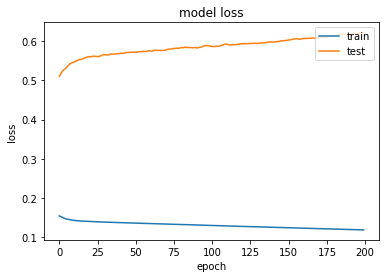

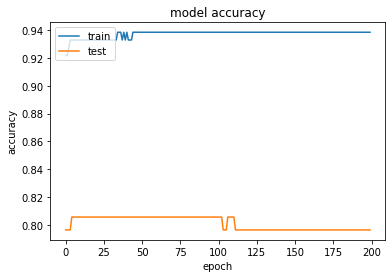

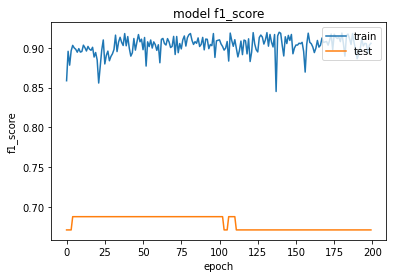

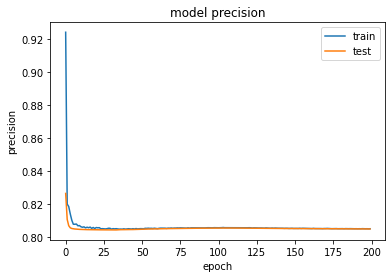

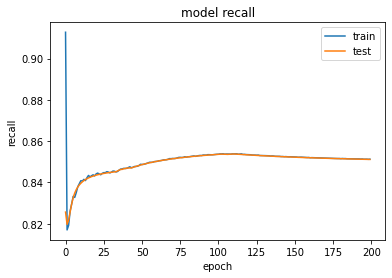

In [171]:
plt.plot(TL.history['loss'])
plt.plot(TL.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(TL.history['accuracy'])
plt.plot(TL.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(TL.history['f1_score'])
plt.plot(TL.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(TL.history['precision_20'])
plt.plot(TL.history['val_precision_20'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(TL.history['recall_20'])
plt.plot(TL.history['val_recall_20'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()